# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [0]:
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(784,))
encode1 = layers.Dense(64, activation="relu")(inputs)
encode2 = layers.Dense(32, activation="relu")(encode1)

lattent = layers.Dense(32, activation="relu")(encode2)
decode1 = layers.Dense(64, activation="relu")(lattent)

decode2 = layers.Dense(784, activation="sigmoid")(decode1)
model = keras.Model(inputs, decode2)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               50960     
Total params: 106,448
Trainable params: 106,448
Non-trainable params: 0
_____________________________________________________

In [0]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model for 1 epoch from Numpy data
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_trainReShape = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_testReShape = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = model.fit(x_trainReShape, x_trainReShape, batch_size=batch_size, epochs=10)

print('\nhistory dict:', history.history)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0437
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0232
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0191
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0171
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0156
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0145
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0137
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0131
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0127
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0124

history dict: {'loss': [0.043707333505153656, 0.02318357303738594, 0.019116943702101707, 0.017087748274207115, 0.015592585317790508, 0.014503204263746738, 0.013667781837284565, 0.013120838

In [0]:
print('\n# Evaluate on test data')
results = model.evaluate(x_testReShape, x_testReShape, batch_size=batch_size)
print('test loss, test acc:', results)


# Evaluate on test data
157/157 [==============================] - 0s 2ms/step - loss: 0.0119
test loss, test acc: 0.011924323625862598


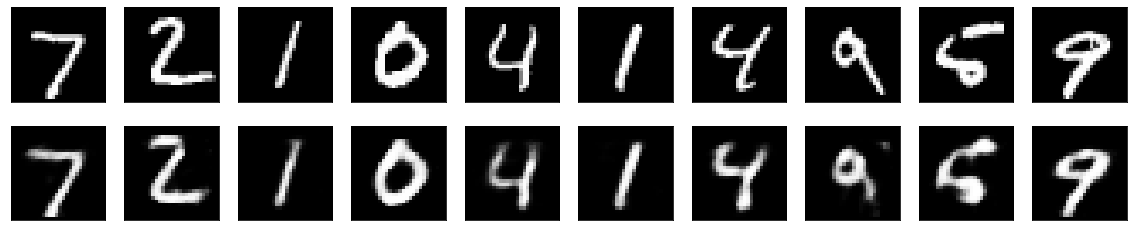

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display

predictions = model.predict(x_testReShape)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_testReShape[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

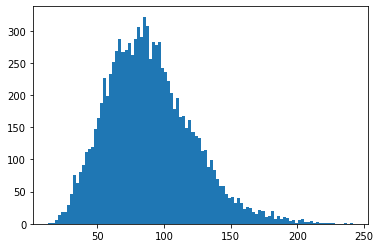

In [0]:
recon_error =  np.sum(tf.square(x_testReShape,predictions),axis=1)
#plot hist 
t=plt.hist(recon_error, bins=100)

In [0]:
#get outliears -> error >80
outliers = x_testReShape[recon_error>200]
outlier_pred = predictions[recon_error>200]

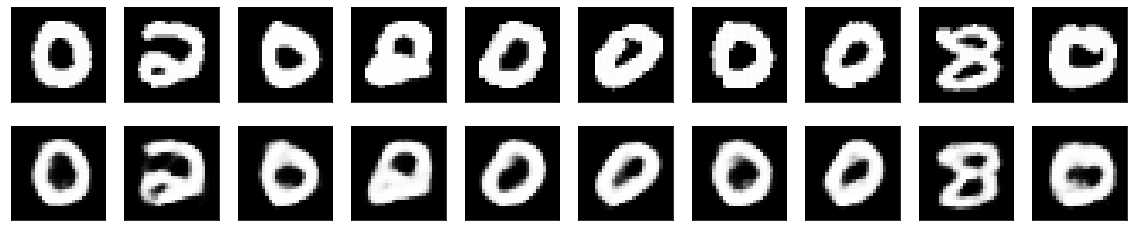

In [0]:
n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outlier_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()